# Case 2 - Myocardial Infection

### David's file

In [60]:
import os
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import plot_confusion_matrix
from Helpfiles import *   ### Our functions

plt.rcParams["figure.figsize"] = (10,6)

## Link to data: https://archive.ics.uci.edu/ml/datasets/Myocardial+infarction+complications#

## Data Load and pre-processing

In [3]:
D = pd.read_csv('~/Documents/DTU/2. Semester (MSc)/CDA/Case2_CDA/Myocardial infarction complications Database.csv', na_values ='?')
D

ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL  \
0        1  77.0    1       2.0        1.0        1.0       2.0       NaN   
1        2  55.0    1       1.0        0.0        0.0       0.0       0.0   
2        3  52.0    1       0.0        0.0        0.0       2.0       NaN   
3        4  68.0    0       0.0        0.0        0.0       2.0       NaN   
4        5  60.0    1       0.0        0.0        0.0       2.0       NaN   
...    ...   ...  ...       ...        ...        ...       ...       ...   
1695  1696  77.0    0       0.0        4.0        2.0       1.0       NaN   
1696  1697  70.0    0       0.0        6.0        2.0       1.0       NaN   
1697  1698  55.0    1       3.0        6.0        2.0       2.0       NaN   
1698  1699  79.0    0       2.0        2.0        2.0       1.0       NaN   
1699  1700  63.0    1       2.0        NaN        NaN       NaN       NaN   

       GB  SIM_GIPERT  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  \
0     3.0         0.0  ...          0           0         0          0   
1     0.0         0.0  ...          0           0         0          0   
2     2.0         0.0  ...          0           0         0          0   
3     2.0         0.0  ...          0           0         0          0   
4     3.0         0.0  ...          0           0         0          0   
...   ...         ...  ...        ...         ...       ...        ...   
1695  2.0         0.0  ...          0           0         1          0   
1696  2.0         0.0  ...          0           0         0          0   
1697  0.0         0.0  ...          0           0         0          0   
1698  2.0         0.0  ...          0           0         0          1   
1699  2.0         0.0  ...          0           0         0          0   

      RAZRIV  DRESSLER  ZSN  REC_IM  P_IM_STEN  LET_IS  
0          0         0    0       0          0       0  
1          0         0    0       0          0       0  
2          0         0    0       0          0       0  
3          0         0    1       0          0       0  
4          0         0    0       0          0       0  
...      ...       ...  ...     ...        ...     ...  
1695       1         0    0       0          0       3  
1696       0         0    0       0          0       1  
1697       0         0    0       1          0       6  
1698       0         0    0       0          0       1  
1699       0         0    0       0          0       1  

[1700 rows x 124 columns]

In [4]:
N, P = D.shape

### Split Data

### Check NaNs

<AxesSubplot:>

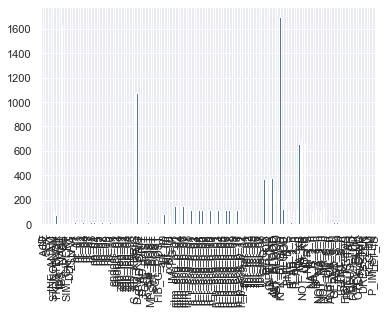

In [5]:
D.isna().sum(axis=0).plot.bar()

#### Drop columns where more than half are NaNs

In [6]:
print('Dropping variables:  %', D.columns[D.isna().sum() > N/2].values)
D = D.drop(columns = D.columns[D.isna().sum() > N/2].values)
N, P = D.shape

Dropping variables:  % ['IBS_NASL' 'S_AD_KBRIG' 'D_AD_KBRIG' 'KFK_BLOOD']


#### Impute NaNs by mode

In [7]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(D)
D = pd.DataFrame(imp.transform(D), columns = D.columns)

### Split X and Y (and if supervised, do train-test split pre-imputation)

In [8]:
X = D.iloc[:, 1:111+1]
X

AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST   GB  SIM_GIPERT  \
0     77.0  1.0       2.0        1.0        1.0       2.0  3.0         0.0   
1     55.0  1.0       1.0        0.0        0.0       0.0  0.0         0.0   
2     52.0  1.0       0.0        0.0        0.0       2.0  2.0         0.0   
3     68.0  0.0       0.0        0.0        0.0       2.0  2.0         0.0   
4     60.0  1.0       0.0        0.0        0.0       2.0  3.0         0.0   
...    ...  ...       ...        ...        ...       ...  ...         ...   
1695  77.0  0.0       0.0        4.0        2.0       1.0  2.0         0.0   
1696  70.0  0.0       0.0        6.0        2.0       1.0  2.0         0.0   
1697  55.0  1.0       3.0        6.0        2.0       2.0  0.0         0.0   
1698  79.0  0.0       2.0        2.0        2.0       1.0  2.0         0.0   
1699  63.0  1.0       2.0        0.0        2.0       2.0  2.0         0.0   

      DLIT_AG  ZSN_A  ...  B_BLOK_S_n  ANT_CA_S_n  GEPAR_S_n  ASP_S_n  \
0         7.0    0.0  ...         0.0         0.0        1.0      1.0   
1         0.0    0.0  ...         0.0         1.0        1.0      1.0   
2         2.0    0.0  ...         1.0         0.0        1.0      1.0   
3         3.0    1.0  ...         0.0         1.0        1.0      1.0   
4         7.0    0.0  ...         0.0         1.0        0.0      1.0   
...       ...    ...  ...         ...         ...        ...      ...   
1695      7.0    0.0  ...         0.0         0.0        0.0      0.0   
1696      7.0    0.0  ...         0.0         0.0        0.0      0.0   
1697      0.0    0.0  ...         1.0         0.0        1.0      1.0   
1698      7.0    0.0  ...         0.0         1.0        1.0      1.0   
1699      0.0    4.0  ...         0.0         0.0        0.0      0.0   

      TIKL_S_n  TRENT_S_n  FIBR_PREDS  PREDS_TAH  JELUD_TAH  FIBR_JELUD  
0          0.0        0.0         0.0        0.0        0.0         0.0  
1          0.0        1.0         0.0        0.0        0.0         0.0  
2          0.0        0.0         0.0        0.0        0.0         0.0  
3          0.0        0.0         0.0        0.0        0.0         0.0  
4          0.0        1.0         0.0        0.0        0.0         0.0  
...        ...        ...         ...        ...        ...         ...  
1695       0.0        0.0         0.0        0.0        0.0         0.0  
1696       0.0        0.0         0.0        0.0        0.0         0.0  
1697       0.0        0.0         0.0        0.0        0.0         0.0  
1698       0.0        0.0         0.0        0.0        0.0         0.0  
1699       0.0        0.0         0.0        0.0        0.0         0.0  

[1700 rows x 111 columns]

In [10]:
Y = D.iloc[:, 112:]
Y

A_V_BLOK  OTEK_LANC  RAZRIV  DRESSLER  ZSN  REC_IM  P_IM_STEN  LET_IS
0          0.0        0.0     0.0       0.0  0.0     0.0        0.0     0.0
1          0.0        0.0     0.0       0.0  0.0     0.0        0.0     0.0
2          0.0        0.0     0.0       0.0  0.0     0.0        0.0     0.0
3          0.0        0.0     0.0       0.0  1.0     0.0        0.0     0.0
4          0.0        0.0     0.0       0.0  0.0     0.0        0.0     0.0
...        ...        ...     ...       ...  ...     ...        ...     ...
1695       1.0        0.0     1.0       0.0  0.0     0.0        0.0     3.0
1696       0.0        0.0     0.0       0.0  0.0     0.0        0.0     1.0
1697       0.0        0.0     0.0       0.0  0.0     1.0        0.0     6.0
1698       0.0        1.0     0.0       0.0  0.0     0.0        0.0     1.0
1699       0.0        0.0     0.0       0.0  0.0     0.0        0.0     1.0

[1700 rows x 8 columns]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Most important variable: Lethal outcome (y)
0: unknown (alive) 1429 84.06% 
1: cardiogenic shock 110 6.47% 
2: pulmonary edema 18 1.06% 
3: myocardial rupture 54 3.18% 
4: progress of congestive heart failure 23 1.35% 
5: thromboembolism 12 0.71% 
6: asystole 27 1.59% 
7: ventricular fibrillation 27 1.59% 

In [12]:
y = Y['LET_IS']

(array([1429.,  110.,   18.,    0.,   54.,   23.,    0.,   12.,   27.,
          27.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

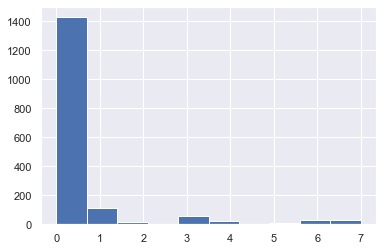

In [18]:
plt.hist(y)

In [21]:
sum(y==0)/len(y)

0.8405882352941176

Notice a **class imbalance**, since most people survived (0)

### Fit Classifiers

#### Random Forest

In [62]:
# Random Forest (with default hyperpars)
clf = RandomForestClassifier()
scores = cross_val_score(clf, X, y, cv = 10, scoring='f1_macro')
print('Test accuracy: ', np.mean(scores), '\nTest accuracy for each fold', scores)

Test accuracy:  0.1765718176706893 
Test accuracy for each fold [0.15341331 0.13541667 0.17857143 0.17775974 0.16294643 0.17775974
 0.18916459 0.18627451 0.2001634  0.20424837]


In [63]:
# Feature Importances
clf.fit(X_train, y_train)
plt.plot(X.columns, clf.feature_importances_, 'bo')
plot_confusion_matrix(clf, X_test, y_test, normalize='true')

#### Support Vector Machine

In [70]:
# Support Vector Machine
svm = sklearn.svm.SVC()
print('Test accuracy: ', np.mean(cross_val_score(svm, X, y, cv = 10, scoring='f1_macro')), '\nTest accuracy for each fold', cross_val_score(svm, X, y, cv = 10, scoring='f1_macro'))

Test accuracy:  0.14752298400275957 
Test accuracy for each fold [0.11421725 0.11421725 0.11421725 0.15341331 0.11421725 0.16889401
 0.16889401 0.15103687 0.18236246 0.19376018]


In [71]:
svm.fit(X_train, y_train)
plot_confusion_matrix(svm, X_test, y_test, normalize='true')

#### Artificial Neural Netork

In [72]:
# Neural Network
nnet = MLPClassifier()
scores = cross_val_score(nnet, X, y, cv = 10, scoring='f1_macro')
print('Test accuracy: ', np.mean(scores), '\nTest accuracy for each fold', scores)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multi

Test accuracy:  0.21439773645529453 
Test accuracy for each fold [0.1770963  0.14638158 0.17459534 0.21287328 0.18089071 0.32668903
 0.26497352 0.18026245 0.28898584 0.1912293 ]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [73]:
nnet.fit(X_train, y_train) # Train on all data post-hyperparametertunning
plot_confusion_matrix(nnet, X_test, y_test, normalize='true')

# Plan:

0. Train/test-split
1. Impute
2. Fit classifier
    a) GridSearch using Bayesian Optimization
    b) F1-metric
3. Normalized Confusion Matrix / read accuracy per class


1-2 is within CV using Pipeline()